In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("yolov8s.pt")  # Load the pre-trained model

In [6]:
results = model("01.jpeg")  # Make predictions on the input image
results = results[0]


image 1/1 s:\Dokumenty\Studiasht\sem6\ISS\01.jpeg: 320x640 12 cars, 2 potted plants, 110.1ms
Speed: 2.0ms preprocess, 110.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


In [17]:
results.show()  # Show the image with the predicted bounding boxes

In [8]:
boxes = results.boxes

labels = results.names

In [9]:
print(boxes)
print(labels)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2., 58.,  2.,  2., 58.,  2.])
conf: tensor([0.8578, 0.8293, 0.8210, 0.7347, 0.7049, 0.6558, 0.5986, 0.4840, 0.4351, 0.4216, 0.4186, 0.4082, 0.3138, 0.2711])
data: tensor([[1.1996e+03, 6.0581e+02, 1.4061e+03, 8.2044e+02, 8.5778e-01, 2.0000e+00],
        [1.3506e+03, 6.4413e+02, 1.5481e+03, 8.2997e+02, 8.2928e-01, 2.0000e+00],
        [1.4641e+03, 6.5407e+02, 1.6797e+03, 8.8475e+02, 8.2104e-01, 2.0000e+00],
        [1.3381e+03, 1.2769e+03, 1.6771e+03, 1.4695e+03, 7.3473e-01, 2.0000e+00],
        [9.9003e+02, 5.2306e+02, 1.2081e+03, 6.9347e+02, 7.0489e-01, 2.0000e+00],
        [2.3157e+03, 6.5627e+02, 2.5061e+03, 8.6499e+02, 6.5581e-01, 2.0000e+00],
        [1.0955e+03, 5.5617e+02, 1.3040e+03, 7.3584e+02, 5.9864e-01, 2.0000e+00],
        [1.6706e+03, 7.9588e+02, 1.7935e+03, 8.7805e+02, 4.8402e-01, 2.0000e+00],
        [2.5449e+03, 4.7230e+02, 2.7594e+03, 6.6181e+02, 4.3512e-01, 

In [13]:
def tensor_to_coords(tensor):
  x1, y1, x2, y2 = tensor
  return (x1.item(), y1.item(), x2.item(), y2.item())

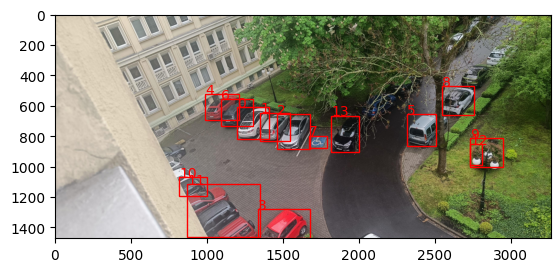

In [15]:
# Draw the bounding boxes on the image

img = plt.imread("01.jpeg")

fig, ax = plt.subplots()

ax.imshow(img)

for box, label in zip(boxes, labels):
    tensor = box.xyxy.flatten()
    x1 = tensor[0]
    y1 = tensor[1]
    x2 = tensor[2]
    y2 = tensor[3]
    width = x2 - x1
    height = y2 - y1
    rect = plt.Rectangle((x1, y1), width, height, fill=False, edgecolor="red")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="red")

## 2. resized cut down image and segmenting into single object

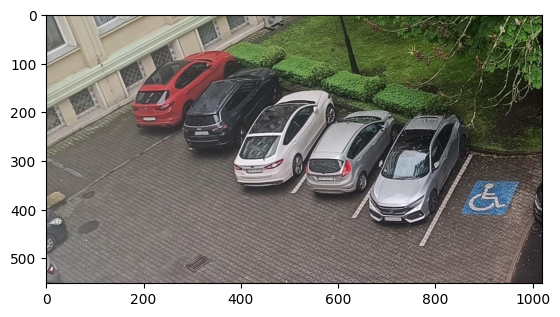

In [47]:
# Img_cut = img[int(y1):int(y2), int(x1):int(x2)]

# cut out the middle of the image (50%)
X, Y, _ = img.shape
Cut_image = img[int(X*(5/16)):int(X*(11/16)), int(Y*(4/16)):int(Y*(9/16))]

plt.imshow(Cut_image)


In [48]:
results = model(Cut_image)  # Make predictions on the input image
results = results[0]


0: 352x640 5 cars, 143.7ms
Speed: 2.0ms preprocess, 143.7ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


In [49]:
results.show()  # Show the image with the predicted bounding boxes

In [52]:
boxes_corners = []

for box in results.boxes:
  boxes_corners.append(box.xyxy.flatten().tolist())

In [53]:
print(boxes_corners)

[[383.49713134765625, 155.07516479492188, 597.0989379882812, 355.7024841308594], [661.97119140625, 197.3363800048828, 859.261962890625, 431.7835693359375], [175.2437744140625, 74.6928482055664, 396.170654296875, 235.41329956054688], [532.375, 194.63201904296875, 718.6826782226562, 370.901611328125], [279.4084167480469, 107.52257537841797, 484.7733154296875, 277.5203552246094]]


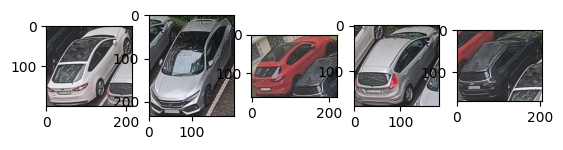

In [55]:
# cut and display the objects as images

fig, ax = plt.subplots(1, len(boxes_corners))

for i, box in enumerate(boxes_corners):
  x1 = box[0]
  y1 = box[1]
  x2 = box[2]
  y2 = box[3]
  width = x2 - x1
  height = y2 - y1
  ax[i].imshow(Cut_image[int(y1):int(y2), int(x1):int(x2)])

plt.show()

## 3. testing the rotation for improved results



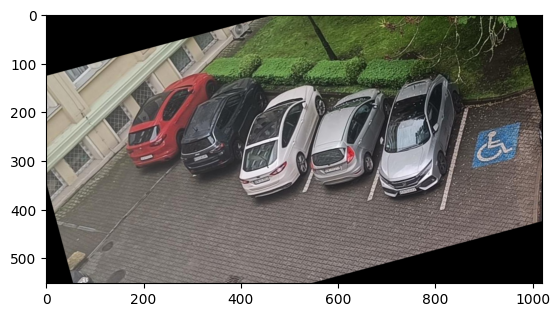

In [62]:
import cv2
# rotate counterclockwise by 25 degrees

matrix = cv2.getRotationMatrix2D((Cut_image.shape[1]//2, Cut_image.shape[0]//2), 15, 1)
rotated_image = cv2.warpAffine(Cut_image, matrix, (Cut_image.shape[1], Cut_image.shape[0]))

plt.imshow(rotated_image)


0: 352x640 3 cars, 94.0ms
Speed: 2.0ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


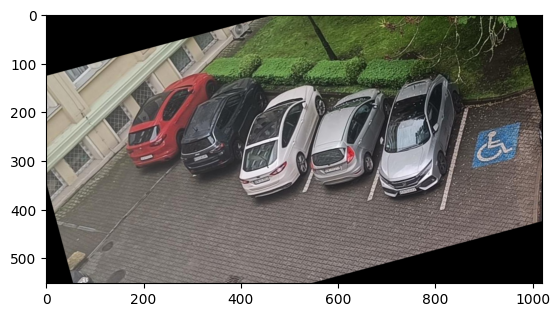

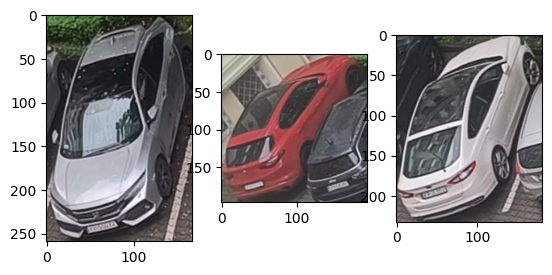

In [65]:
results = model(rotated_image)  # Make predictions on the input image
results = results[0]

results.show()  # Show the image with the predicted bounding boxes

boxes_corners = []

for box in results.boxes:
  boxes_corners.append(box.xyxy.flatten().tolist())

plt.imshow(rotated_image)
# cut and display the objects as images

fig, ax = plt.subplots(1, len(boxes_corners))

for i, box in enumerate(boxes_corners):
  x1 = box[0]
  y1 = box[1]
  x2 = box[2]
  y2 = box[3]
  width = x2 - x1
  height = y2 - y1
  ax[i].imshow(rotated_image[int(y1):int(y2), int(x1):int(x2)])

plt.show()